In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Mall_Customers.csv")

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


No missing values

In [6]:
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [7]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## EDA

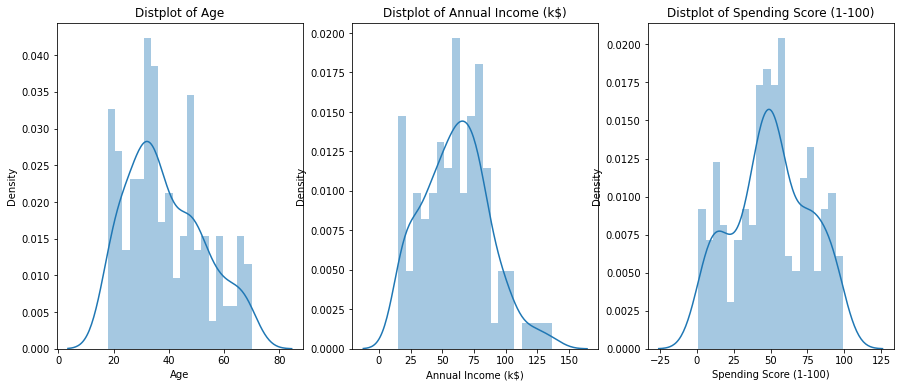

In [8]:
plt.figure(1 , figsize = (15 , 6))
n = 0 
for x in ['Age' , 'Annual Income (k$)' , 'Spending Score (1-100)']:
    n += 1
    plt.subplot(1 , 3 , n)
    sns.distplot(df[x] , bins = 20)
    plt.title('Distplot of {}'.format(x))
plt.show()

<AxesSubplot:>

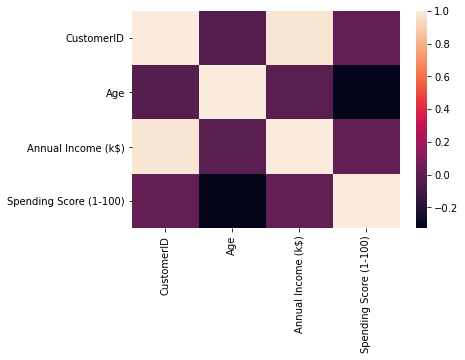

In [9]:
sns.heatmap(df.corr())

## K Means Clustering

In [10]:
x = df[['Age','Annual Income (k$)','Spending Score (1-100)']]

In [11]:
wcss = []
score = []
for n in range(2,10):
    kmeans = KMeans(n)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    score.append(metrics.silhouette_score(x,kmeans.labels_))

### Get range from Elbow method and finalize number of clusters (k) using Silhouette Coefficient

In [12]:
import plotly.graph_objects as go
fig = go.Figure(go.Scatter(x=tuple(range(2,10)), y=wcss,
                    mode='lines+markers',
                    name='lines+markers'))
fig.update_xaxes(title_text="Number of clusters")
fig.update_yaxes(title_text="Within Cluster Sum of Squares")
fig.show()

In [13]:
import plotly.graph_objects as go
fig = go.Figure(go.Scatter(x=tuple(range(2,10)), y=score,
                    mode='lines+markers',
                    name='lines+markers'))
fig.update_yaxes(title_text="Silhouette Coefficient")
fig.update_xaxes(title_text="Number of clusters")
fig.show()

We can see that the best result is possible at cluster n=6.

In [14]:
kmeans = KMeans(6)
kmeans.fit(x)

KMeans(n_clusters=6)

In [15]:
x_clusters = x.copy()
x_clusters['Cluster'] = kmeans.labels_

## Visualization

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

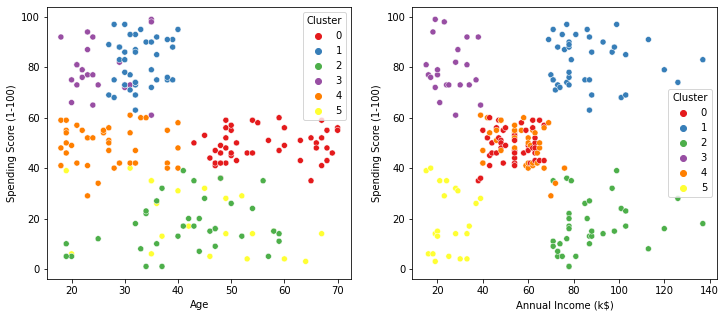

In [16]:
fig, (axes) = plt.subplots(1,2,figsize=(12,5))
sns.scatterplot(x=x_clusters['Age'], y=x_clusters['Spending Score (1-100)'],
                hue=x_clusters['Cluster'],ax=axes[0], palette='Set1', legend='full')
sns.scatterplot(x=x_clusters['Annual Income (k$)'], y=x_clusters['Spending Score (1-100)'],
                hue=x_clusters['Cluster'],ax=axes[1], palette='Set1', legend='full')

In [17]:
import plotly.express as px
df = px.data.iris()
fig = px.scatter_3d(x_clusters, x='Age', y='Spending Score (1-100)', z='Annual Income (k$)',
              color='Cluster')
fig.show()

<AxesSubplot:>

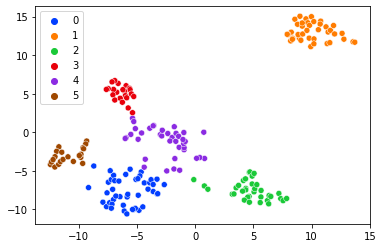

In [18]:
from sklearn.manifold import TSNE
tsne = TSNE()
palette = sns.color_palette("bright", 6)
X_embedded = tsne.fit_transform(x)
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=kmeans.labels_, legend='full', palette=palette)